**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>


**Evaluation metric**
macro f1 score

### Import used libraries

In [1]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
# Useful when you're working with a large dataset and want to 
# see more of it without it being cut off.
pd.set_option('display.max_rows', 500)
# This tells pandas to show up to 500 characters in each column's cell (especially useful for columns with long text or URLs)
pd.set_option('display.max_colwidth', 500)
from sklearn.model_selection import train_test_split
import plotly.express as px
from nltk.corpus import stopwords
import regex as re
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# # Make sure you have downloaded the required NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

### Load Dataset

###### Note: The difference between csv (comma separated value) and tsv (Tap separated value) file

In [2]:
df = pd.read_csv("../Data/Hate Speech.tsv", sep= "\t", index_col='id')
df.head(100)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦


In [3]:
# Check Null values 
print("Null values: ", df.isnull().sum())

Null values:  label    0
tweet    0
dtype: int64


In [4]:
print("duplicates: ", df.duplicated(subset=['tweet', 'label']).sum())

duplicates:  2404


In [5]:
# Drawing pie chart of duplicates using plotly
fig = px.pie(df, values=df.duplicated(subset=['tweet', 'label']).value_counts(), names=df.duplicated(subset=['tweet', 'label']).value_counts().index, title="Duplicates",width=500, height=450)
fig.show()

In [6]:
df.drop_duplicates(subset='tweet',inplace=True) 
# After that we will find that there is no more duplicates
print("duplicates: ", df.duplicated(subset=['tweet', 'label']).sum())

duplicates:  0


In [7]:
df.reset_index(inplace=True)
df.drop(columns=['id'], inplace=True)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


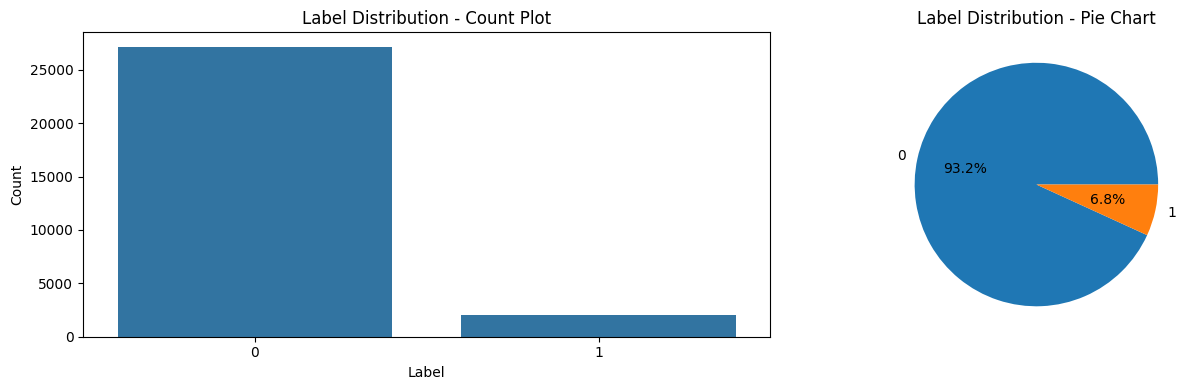

In [8]:
# show if there is any imbalance in the dataset - plotting using bar chart using seaborn

# Count label values
label_counts = df['label'].value_counts().sort_index()

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Countplot (bar chart)
sns.countplot(x='label', data=df, ax=axs[0])
axs[0].set_title('Label Distribution - Count Plot')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# Pie chart
axs[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axs[1].set_title('Label Distribution - Pie Chart')

# Show both plots
plt.tight_layout()
plt.show()

In [9]:
# <!-- i tried to augment label 1 using llms and i will try to use it instead  --> 
df = pd.read_csv("../Data/Hate Speech augmented.tsv", sep= "\t")
df

,tweet,label
0,I am not going to the party tonight.,1
1,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0
2,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0
3,She does not like coffee.,1
4,They are not coming with us.,1
...,...,...
31840,ate @user isz that youuu?ðððððððððâ¤ï¸,0
31841,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,0
31842,listening to sad songs on a monday morning otw to work is sad,0
31843,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",1


In [10]:
df.drop_duplicates(subset='tweet',inplace=True) 
# After that we will find that there is no more duplicates
print("duplicates: ", df.duplicated(subset=['tweet', 'label']).sum())
df.reset_index(inplace=True)

duplicates:  0


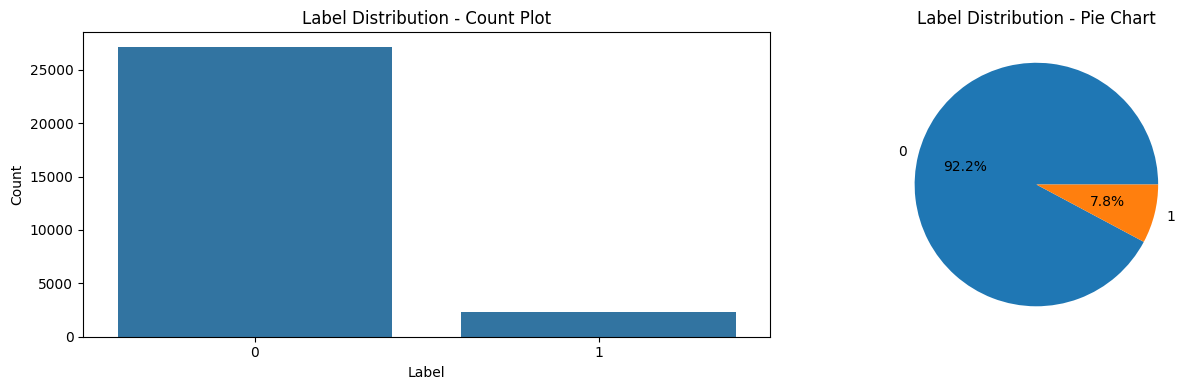

In [11]:
# show if there is any imbalance in the dataset - plotting using bar chart using seaborn

# Count label values
label_counts = df['label'].value_counts().sort_index()

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Countplot (bar chart)
sns.countplot(x='label', data=df, ax=axs[0])
axs[0].set_title('Label Distribution - Count Plot')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# Pie chart
axs[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axs[1].set_title('Label Distribution - Pie Chart')

# Show both plots
plt.tight_layout()
plt.show()

In [12]:
df.drop(columns=['index'], inplace=True)    

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

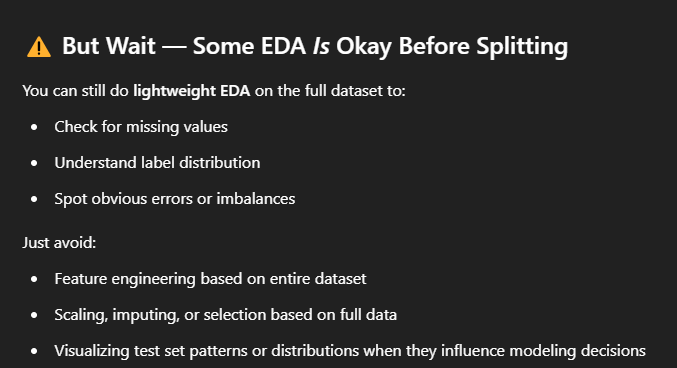
<br>
<B>-------------------------------------------------------------------------------------------------------------</B>
<br>
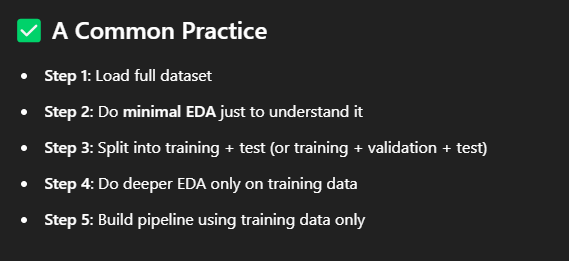

In [13]:
x = df.drop(columns=['label'])
y = df['label']

In [14]:
# Making stratified samples to ensure that the distribution of labels is similar in the dataset
def stratified_split(x, y, test_size=0.2, val_size=0.5, random_state=99):
    x_train, x_temp, y_train, y_temp = train_test_split(
        x, y, test_size=test_size, stratify=y, random_state=random_state)
    x_val, x_test, y_val, y_test = train_test_split(
        x_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=random_state)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [15]:
x_train, x_valid, x_test, y_train, y_valid, y_test = stratified_split(x, y, test_size=0.2, val_size=0.5, random_state=99)

In [16]:
print(x_train.shape, x_valid.shape, x_test.shape)

(23551, 1) (2944, 1) (2944, 1)


### EDA & Preprocessing on training data

- show a representative sample of data texts to find out required preprocessing steps

In [17]:
x_train.values[0:10]

array([['i am thankful for taxis. #thankful #positive'],
       ["ioc's bach 'happy' with new brazil president's commitment to rio: rio de janeiro (afp) - international..."],
       ['when will this #pms end?! i hate feeling my feelings of hatred. bleed vagina! just bleed! #girlproblems   #unfocused #tmi'],
       ['@user @user @user @user i fought against both sides of the argument yesterday:'],
       ['i lost a foune on the pougal vs iceland game, had some concerns when they announced the big line up changes, still so much lost  '],
       ['#gogirl 10-17 #summer   #fun #wellbeing @user #cardiff #swansea book now pls'],
       ['i am ecstatic. #i_am #positive #affirmation'],
       ['@user yeah only 1 days to go #oneyearofhinaontwiteer   ð\x9f\x99\x8cð\x9f\x99\x8cð\x9f\x99\x8cð\x9f\x99\x8c'],
       ['@user @user @user @user @user massive censorship'],
       [' fathersdaymessage  #father\'s #day #message #tie #| #zazzle buy things about "hâ\x80¦  ']],
      dtype=object)

- Cleaning and Preprocessing are:
    - 1 applying lowercase 
    - 2 remove stop words 
    - 3 applying (Removing newlines and tabs - Removing URLs - Removing punctuations - Removing contractions (like i'm) - Characters normalization
                  Removing usernames & tags - Removing emojis - Removing numbers - Removing extra whitespaces ) 
    - 4 Tokenization
    - 5 Lemmatization


In [18]:
def text_preprocessing(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Normalize characters
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    
    # Lowercase
    text = text.lower()

    # Expand contractions
    contractions = {
        "can't": "can not", "won't": "will not", "n't": " not", "'re": " are",
        "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have", "'m": " am"
    }
    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)

    # Remove URLs, usernames, hashtags, emojis, punctuation, numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@[^\s]+', '', text)
    text = re.sub(r'#', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove newlines/tabs, extra whitespaces
    text = text.replace('\n', ' ').replace('\t', ' ')
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Join back into string
    text = ' '.join(tokens)

    return text

In [19]:
# x_train['tweet'] = x_train['tweet'].apply(text_preprocessing)
# x_train

# df['tweet'] = df['tweet'].apply(text_preprocessing)
# # save preprocessed data
# df.to_csv('../Data/preprocessed_data.csv', index=False)

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

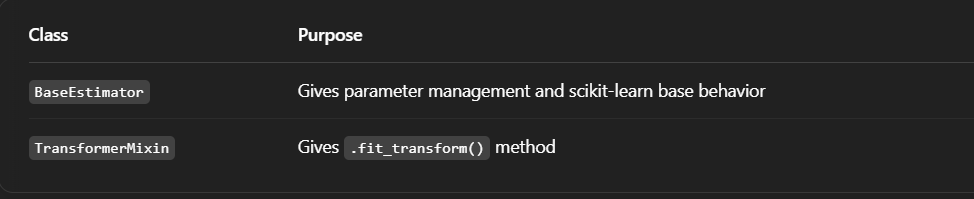

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextPreprocessor(BaseEstimator, TransformerMixin):
    # No fitting needed in preprocessing, just return self
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X['tweet'].apply(text_preprocessing)    


<B>Applying Feature Extraction (Vectorization)</B>

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
from nltk.tokenize import word_tokenize

class UnifiedTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, method='count', embedding_model=None, embedding_dim=300,
                 min_df=1, max_df=1.0, ngram_range=(1, 1), min_count=1):
        self.method = method
        self.embedding_model = embedding_model
        self.embedding_dim = embedding_dim
        self.min_df = min_df
        self.max_df = max_df
        self.ngram_range = ngram_range
        self.min_count = min_count
        
        self.vectorizer = None

    def fit(self, X, y=None):
        if self.method in ['count', 'tfidf']:
            VectorizerClass = CountVectorizer if self.method == 'count' else TfidfVectorizer
            self.vectorizer = VectorizerClass(
                min_df=self.min_df,
                max_df=self.max_df,
                ngram_range=self.ngram_range
            )
            self.vectorizer.fit(X)
        return self

    def transform(self, X):
        if self.method in ['count', 'tfidf']:
            return self.vectorizer.transform(X)

        elif self.method in ['word2vec', 'glove', 'fasttext']:
            return np.array([self._embed_text(doc) for doc in X])

        else:
            raise ValueError(f"Unsupported method: {self.method}")

    def _embed_text(self, text):
        tokens = word_tokenize(text)
        if hasattr(self.embedding_model, 'get_word_vector'):
            vectors = [self.embedding_model.get_word_vector(word)
                       for word in tokens if word.strip() != '']
        else:
            vectors = [self.embedding_model[word]
                       for word in tokens if word in self.embedding_model]

        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(self.embedding_dim)


In [22]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os


def tokenize_texts(text_series):
    return [word_tokenize(text.lower()) for text in text_series]


def train_word2vec(tokenized_text, vector_size=100, window=5, min_count=2, workers=4, epochs=10):
    model = Word2Vec(
        sentences=tokenized_text,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers,
        epochs=epochs
    )
    return model.wv  # return the KeyedVectors only (lightweight)



In [152]:
# tokenize_text = tokenize_texts(x_train['tweet'])


#                       (word2vec)
# word2vec_model = train_word2vec(tokenize_text, vector_size=100, window=5, min_count=2, workers=4, epochs=10)

# saving the Embeddings to use it in the pipeline
# word2vec_model.save_word2vec_format("word2vec.txt", binary=False)


### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [153]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec


# load word2vec model
word2vec_model = KeyedVectors.load_word2vec_format(r"C:\Users\aliay\OneDrive\Desktop\iTi\27 - NLP\Hate-Speech-Classification\models\word2vec.txt", binary=False)


# convert GloVe to Word2Vec format to read it into gensim
# glove_input_file = r"C:\Users\aliay\OneDrive\Desktop\iTi\27 - NLP\Hate-Speech-Classification\models\glove.6B.100d.txt"
word2vec_output_file = r"C:\Users\aliay\OneDrive\Desktop\iTi\27 - NLP\Hate-Speech-Classification\models\glove.6B.100d.word2vec.txt"

# glove2word2vec(glove_input_file, word2vec_output_file)
Glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Load the FastText model 
fasttext_model = KeyedVectors.load_word2vec_format(r'C:\Users\aliay\OneDrive\Desktop\iTi\27 - NLP\Hate-Speech-Classification\models\wiki-news-300d-1M.vec', binary=False)



In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform 

pipe = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('vectorize', UnifiedTextVectorizer(method='tfidf')),      # default, will override in params
    ('clf', LogisticRegression())                              # default, will override in params
])


models = {
    'LogisticRegression': (LogisticRegression(solver='liblinear'), {
        'clf__C': uniform(0.01, 10),
        'clf__class_weight': [None, 'balanced']
    }),
    'RandomForest': (RandomForestClassifier(), {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20, None],
        'clf__class_weight': [None, 'balanced'],
        'clf__ngram_range': [(1, 1), (1, 3)]
    })
}   


#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

for model_name, (model, params) in models.items():
    print(f"Running model: {model_name}")
    
    pipe.set_params(clf=model)
    
    search = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=10,
        scoring=make_scorer(f1_score, average='macro'),
        cv=5,
        verbose=1,
        random_state=99
    )
    
    search.fit(x_train, y_train)
    
    print(f"Best score for {model_name}: {search.best_score_}")
    print(f"Best params: {search.best_params_}")


Running model: LogisticRegression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score for LogisticRegression: 0.8086590959627372
Best params: {'clf__C': 6.732785586307918, 'clf__class_weight': 'balanced'}
Running model: RandomForest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score for RandomForest: 0.7879960392520491
Best params: {'clf__n_estimators': 100, 'clf__max_depth': None, 'clf__class_weight': None}


In [ ]:
y_pred = search.predict(x_test)

<!-- Random >> 84 >>> tfidf -->

In [ ]:
# evaluation
print("Best Parameters:", search.best_estimator_)  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: Pipeline(steps=[('preprocess', TextPreprocessor()),
                ('vectorize', UnifiedTextVectorizer(method='tfidf')),
                ('clf', RandomForestClassifier())])
Accuracy: 0.9605217988328184
Precision: 0.9227142996140498
Recall: 0.7413236040186193
F1 Score: 0.8034935266281977


### Conclusion and final results


In [ ]:
# method='tfidf', min_df=2,min_count=2, max_df=0.9, ngram_range=(1, 3)
# n_estimators=500, max_depth=None, class_weight='balanced')

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score , accuracy_score, precision_score, recall_score

In [176]:
# make a random forest model with these params  
pipe = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('vectorize', UnifiedTextVectorizer(method='tfidf', min_df=2,min_count=2, max_df=0.9, ngram_range=(1, 3))),
    ('clf', RandomForestClassifier(n_estimators=400, max_depth=None, class_weight='balanced'))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)


In [177]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')    
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9476902173913043
Precision: 0.880176161061542
Recall: 0.712969786293294
F1 Score: 0.7685718894394998


In [178]:
# get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2714
           1       0.81      0.43      0.56       230

    accuracy                           0.95      2944
   macro avg       0.88      0.71      0.77      2944
weighted avg       0.94      0.95      0.94      2944



In [ ]:
# the best model for me and i will use it for deployment 
pipe = Pipeline([
    ('preprocess', TextPreprocessor()),
    ('vectorize', UnifiedTextVectorizer(method='tfidf', min_df=2,min_count=2, max_df=0.9, ngram_range=(1, 3))),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [198]:
# get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2714
           1       0.55      0.79      0.65       230

    accuracy                           0.93      2944
   macro avg       0.77      0.87      0.81      2944
weighted avg       0.95      0.93      0.94      2944



In [200]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')    
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Test the loaded model with some data
sample_text = ["I fucking hate you"]
text = pd.DataFrame({'tweet':sample_text})
prediction = pipe.predict(text)

print(prediction)
print("Confidence:", round(max(pipe.predict_proba(text)[0]) * 100, 2), "%")


Accuracy: 0.9330842391304348
Precision: 0.7657069629853488
Recall: 0.8662122328666175
F1 Score: 0.8053087185216343
[1]
Confidence: 75.36 %


In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(pipe, open('../production_model/' + filename, 'wb'))

In [203]:
import joblib

# Load the saved pipeline
loaded_pipe = joblib.load('../production_model/finalized_model.pkl')

# Test the loaded model with some data
sample_text = ["I bad this!"]
text = pd.DataFrame({'tweet':sample_text})
prediction = loaded_pipe.predict(text)
print(prediction)

[0]


#### Done!